In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet("../data/processed/online_retail_clean.parquet")

In [3]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,MonthYear,Cohort,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12,2009-12,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009-12,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009-12,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12,2009-12,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12,2009-12,2009-12


In [5]:
df['CohortIndex'] = df['InvoiceMonth'].dt.year * 12 + df['InvoiceMonth'].dt.month 

In [6]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [7]:
invoice_year, invoice_month = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month = get_date_int(df, 'Cohort')

In [8]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [9]:
df['CohortIndex'] = years_diff * 12 + months_diff 

In [10]:
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,MonthYear,Cohort,InvoiceMonth,CohortIndex
3214,489802,11001,ASSTD DESIGN RACING CAR PEN,2,2009-12-02 12:32:00,1.69,15581.0,United Kingdom,3.38,2009-12,2009-12,2009-12,0
349248,531468,22082,RIBBON REEL STRIPES DESIGN,15,2010-11-08 13:58:00,1.65,14821.0,United Kingdom,24.75,2010-11,2010-02,2010-11,9
355197,532095,21390,FILIGRIS HEART WITH BUTTERFLY,8,2010-11-10 16:05:00,1.25,14651.0,United Kingdom,10.00,2010-11,2010-03,2010-11,8
69581,498554,85189,HANGING BUTTERFLY EGG,24,2010-02-21 11:08:00,0.85,13761.0,United Kingdom,20.40,2010-02,2010-02,2010-02,0
50753,496054,47591C,BLUE FAIRY CAKE CHILD'S APRON,8,2010-01-28 14:39:00,1.95,15544.0,United Kingdom,15.60,2010-01,2010-01,2010-01,0


##### analyse heatmap :



In [11]:
cohort_counts = df.groupby(['Cohort', 'CohortIndex'])['Customer ID'].nunique()

In [12]:
cohort_counts_df = cohort_counts.to_frame().rename(columns={'Customer ID' : 'Total Customers'}).sort_values(by='Total Customers', ascending=False)

In [13]:
cohort_counts_df

Total Customers
Cohort  CohortIndex                 
2009-12 0                       1045
        11                       518
        10                       452
        3                        447
2010-03 0                        436
...                              ...
2010-12 8                          5
        2                          4
        6                          4
        12                         3
        9                          2

[325 rows x 1 columns]

In [14]:
cohort_counts_df['retention_rate'] = cohort_counts_df['Total Customers'] / cohort_counts_df.groupby(['Cohort'])['Total Customers'].transform('max')

In [15]:
cohort_counts_df

Total Customers  retention_rate
Cohort  CohortIndex                                 
2009-12 0                       1045        1.000000
        11                       518        0.495694
        10                       452        0.432536
        3                        447        0.427751
2010-03 0                        436        1.000000
...                              ...             ...
2010-12 8                          5        0.064935
        2                          4        0.051948
        6                          4        0.051948
        12                         3        0.038961
        9                          2        0.025974

[325 rows x 2 columns]

In [16]:
cohorts_pivot = cohort_counts_df.pivot_table(index='Cohort', columns='CohortIndex', values='retention_rate') 

In [17]:
cohorts_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Cohort,,,,,,,,,,,,,,,,,,,,,
2009-12,1.0,0.375120,0.342584,0.427751,0.392344,0.390431,0.390431,0.357895,0.339713,0.375120,...,0.305263,0.261244,0.302392,0.289952,0.274641,0.262201,0.317703,0.305263,0.408612,0.208612
2010-01,1.0,0.218274,0.302030,0.304569,0.279188,0.291878,0.266497,0.230964,0.289340,0.340102,...,0.152284,0.218274,0.187817,0.175127,0.185279,0.236041,0.185279,0.223350,0.073604,NaN
2010-02,1.0,0.301939,0.227147,0.304709,0.257618,0.210526,0.218837,0.285319,0.277008,0.293629,...,0.204986,0.185596,0.168975,0.146814,0.235457,0.249307,0.171745,0.063712,NaN,NaN
2010-03,1.0,0.217890,0.259174,0.236239,0.229358,0.199541,0.240826,0.298165,0.288991,0.114679,...,0.169725,0.174312,0.158257,0.169725,0.204128,0.213303,0.075688,NaN,NaN,NaN
2010-04,1.0,0.230241,0.199313,0.161512,0.185567,0.230241,0.271478,0.261168,0.113402,0.116838,...,0.147766,0.140893,0.140893,0.171821,0.209622,0.065292,NaN,NaN,NaN,NaN
2010-05,1.0,0.192913,0.177165,0.192913,0.188976,0.259843,0.220472,0.129921,0.066929,0.086614,...,0.129921,0.141732,0.165354,0.157480,0.047244,NaN,NaN,NaN,NaN,NaN
2010-06,1.0,0.215613,0.197026,0.204461,0.230483,0.282528,0.130112,0.092937,0.081784,0.118959,...,0.122677,0.137546,0.204461,0.059480,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.207650,0.202186,0.284153,0.300546,0.153005,0.114754,0.153005,0.142077,0.120219,...,0.174863,0.245902,0.092896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.246835,0.316456,0.322785,0.183544,0.132911,0.101266,0.139241,0.145570,0.132911,...,0.202532,0.069620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Taux de Rétention par Cohorte'}, xlabel='CohortIndex', ylabel='Cohort'>

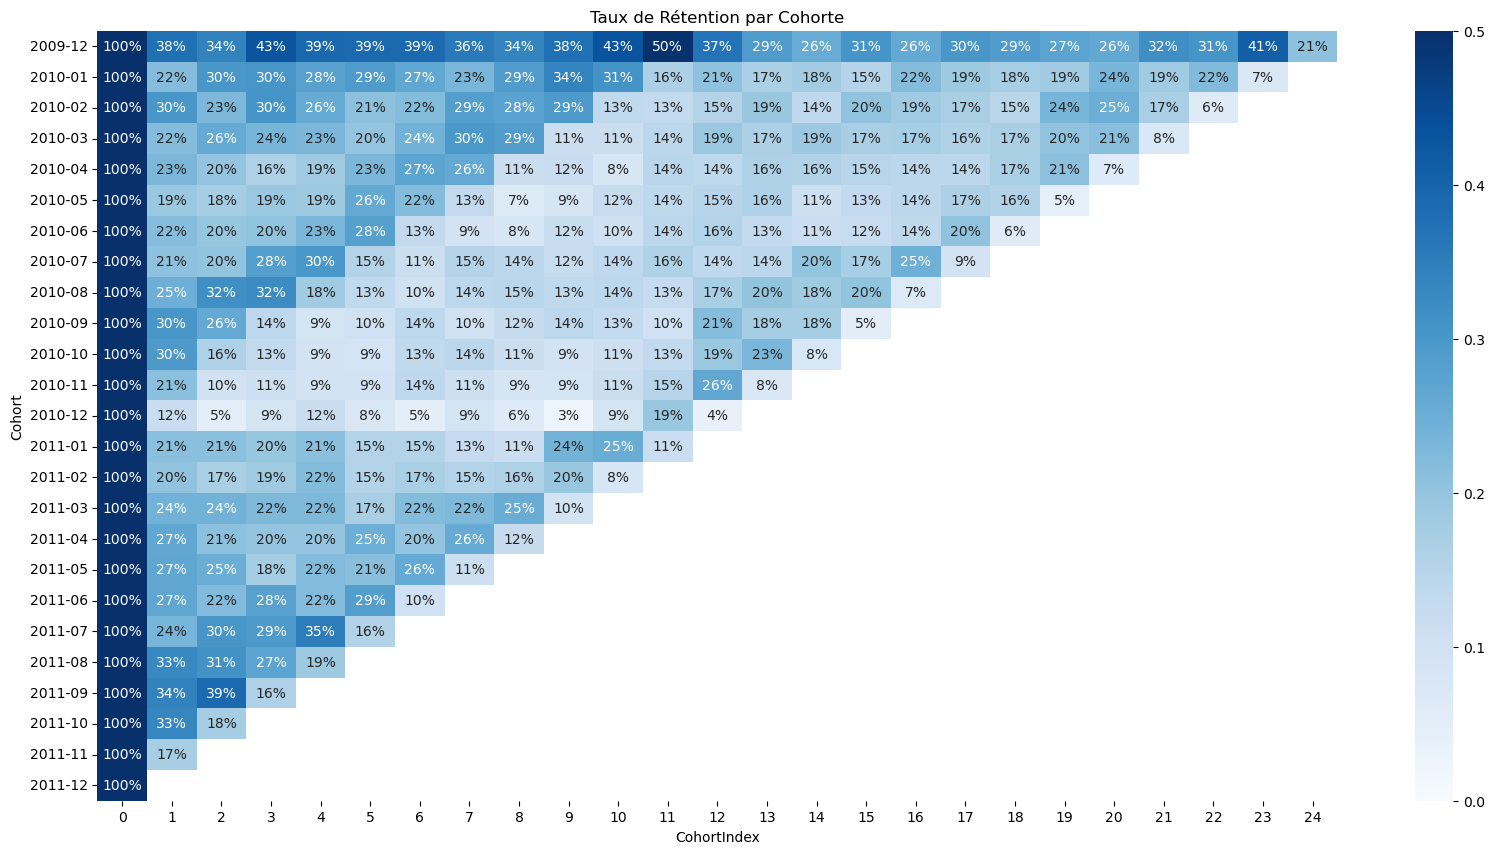

In [18]:
plt.figure(figsize=(20, 10))
plt.title('Taux de Rétention par Cohorte')
sns.heatmap(data=cohorts_pivot, 
            annot=True, 
            fmt='.0%', 
            cmap='Blues', 
            vmin=0.0,
            vmax=0.5)

##### densité de CA par âge (âge est l'âge de la promotion donc 'Cohort')

<Axes: title={'center': 'Densité de CA par âge de la Cohorte'}, xlabel='TotalPrice', ylabel='Density'>

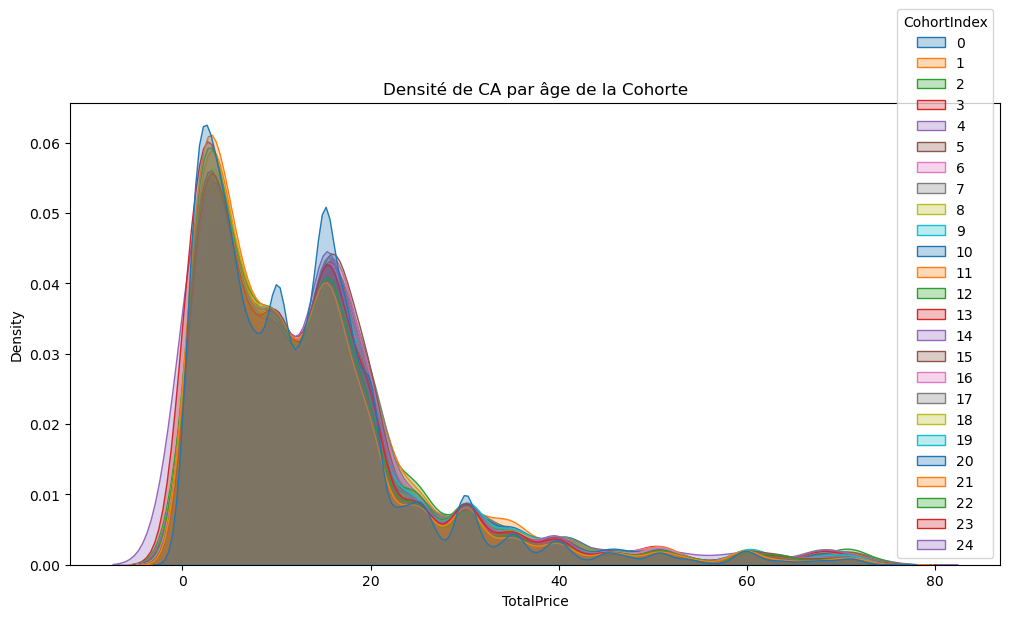

In [25]:
subset = df[(df['TotalPrice'] > 0) & (df['TotalPrice'] < 75)]

plt.figure(figsize=(12,6))
plt.title('Densité de CA par âge de la Cohorte')
sns.kdeplot(
    data=subset,
    x='TotalPrice',      # Axe X : On regarde la distribution du CA
    hue='CohortIndex',   # Couleurs : On distingue selon l'âge
    fill=True,           # On remplit sous la courbe pour faire joli
    common_norm=False,   # Chaque courbe est indépendante (on compare la FORME)
    palette='tab10',
    alpha=0.3
)

dans streamlit : mettre un SelectBox avec de 0 à 24 Age afin de pouvoir sélectionner la cohorte voulue